# **TUGAS 2 - KLASIFIKASI**

**Kelompok 11 - Statistika 2023A**


Anggota Kelompok :
- Nisrina Alissy (1314623008)
- Jessica Aurelia P. (1314623031)

Import library

In [ ]:
#Import library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/telco.csv')

# EDA

In [ ]:
df.head()

,Unnamed: 0,CDR_VOICE_DRTN_MIN,REV_VOICE,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_IDD,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_IDD,...,REV_DATA,AMT_RATIO_BANKING,AMT_RATIO_CONVENIENT,AMT_RATIO_MODERN,TRX_RATIO_BANKING,TRX_RATIO_CONVENIENT,TRX_RATIO_MODERN,NUM_DAYS_WITH_RECHARGE,NUM_UNQ_LACCI_ID,NUM_UNQ_REGION
0,1,51.333333,77004.666667,172.000000,0.718000,0.990488,0.0,0.0,0.998028,0.0,...,23134.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,19.000000,4.000000,1.000000
1,2,44.000000,37837.333333,26.000000,0.639181,0.807018,0.0,0.0,0.916667,0.0,...,4174.0,0.000000,0.0,0.403361,0.000,0.0,0.348214,5.000000,3.000000,2.000000
2,3,443.000000,218716.666670,260.333333,0.804948,0.997750,0.0,0.0,0.999718,0.0,...,47500.5,0.524698,0.0,0.524698,0.365,0.0,0.365000,15.666667,7.666667,1.000000
3,4,141.333333,138634.000000,128.333333,0.766392,0.940624,0.0,0.0,0.872776,0.0,...,0.0,0.357143,0.0,0.446032,0.250,0.0,0.403704,5.666667,4.333333,1.000000
4,5,681.333333,353258.333330,366.666667,0.820502,0.932896,0.0,0.0,0.826449,0.0,...,70000.0,1.000000,1.0,1.000000,1.000,1.0,1.000000,5.666667,2.666667,1.333333


In [ ]:
df.columns

Index(['Unnamed: 0', 'CDR_VOICE_DRTN_MIN', 'REV_VOICE', 'CDR_TXN_VOICE',
       'CDR_RATIO_WORK_VOICE', 'CDR_RATIO_VOICE_ONNET', 'CDR_RATIO_VOICE_IDD',
       'CDR_RATIO_VOICE_ROAM', 'CDR_RATIO_SMS_ONNET', 'CDR_RATIO_SMS_IDD',
       'CDR_RATIO_SMS_ROAMING', 'REV_SMS', 'CDR_TOTAL_DATA_MB',
       'CDR_RATIO_DATA_WEEKEND', 'CDR_RATIO_DATA_3G', 'CDR_RATIO_DATA_4G',
       'REV_DATA', 'AMT_RATIO_BANKING', 'AMT_RATIO_CONVENIENT',
       'AMT_RATIO_MODERN', 'TRX_RATIO_BANKING', 'TRX_RATIO_CONVENIENT',
       'TRX_RATIO_MODERN', 'NUM_DAYS_WITH_RECHARGE', 'NUM_UNQ_LACCI_ID',
       'NUM_UNQ_REGION'],
      dtype='object')

In [ ]:
ds=df[['REV_DATA','REV_SMS','REV_VOICE','CDR_VOICE_DRTN_MIN','CDR_TXN_VOICE','CDR_RATIO_WORK_VOICE','CDR_RATIO_VOICE_ONNET','CDR_RATIO_VOICE_ROAM','CDR_RATIO_SMS_ONNET'
,'CDR_RATIO_SMS_ROAMING']]
ds.head()

,REV_DATA,REV_SMS,REV_VOICE,CDR_VOICE_DRTN_MIN,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_ROAMING
0,23134.0,38216.666667,77004.666667,51.333333,172.000000,0.718000,0.990488,0.0,0.998028,0.0
1,4174.0,10658.333333,37837.333333,44.000000,26.000000,0.639181,0.807018,0.0,0.916667,0.0
2,47500.5,90503.000000,218716.666670,443.000000,260.333333,0.804948,0.997750,0.0,0.999718,0.0
3,0.0,9125.000000,138634.000000,141.333333,128.333333,0.766392,0.940624,0.0,0.872776,0.0
4,70000.0,74983.333333,353258.333330,681.333333,366.666667,0.820502,0.932896,0.0,0.826449,0.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REV_DATA               50000 non-null  float64
 1   REV_SMS                50000 non-null  float64
 2   REV_VOICE              50000 non-null  float64
 3   CDR_VOICE_DRTN_MIN     50000 non-null  float64
 4   CDR_TXN_VOICE          50000 non-null  float64
 5   CDR_RATIO_WORK_VOICE   50000 non-null  float64
 6   CDR_RATIO_VOICE_ONNET  50000 non-null  float64
 7   CDR_RATIO_VOICE_ROAM   50000 non-null  float64
 8   CDR_RATIO_SMS_ONNET    50000 non-null  float64
 9   CDR_RATIO_SMS_ROAMING  50000 non-null  float64
dtypes: float64(10)
memory usage: 3.8 MB


In [ ]:
# Mengecek missing value
ds.isna().sum()

,0
REV_DATA,0
REV_SMS,0
REV_VOICE,0
CDR_VOICE_DRTN_MIN,0
CDR_TXN_VOICE,0
CDR_RATIO_WORK_VOICE,0
CDR_RATIO_VOICE_ONNET,0
CDR_RATIO_VOICE_ROAM,0
CDR_RATIO_SMS_ONNET,0
CDR_RATIO_SMS_ROAMING,0


In [ ]:
#Cek apakah terdapat duplikat data
ds.duplicated().any()

np.True_

In [ ]:
#ringkasan statistik
ds.describe()

,REV_DATA,REV_SMS,REV_VOICE,CDR_VOICE_DRTN_MIN,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_ROAMING
count,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,4.891276e+04,20244.507963,8.342499e+04,333.997703,120.899297,0.733704,0.882236,0.002507,0.772195,0.001623
std,8.156402e+04,23838.133955,8.164276e+04,542.590538,154.433260,0.141131,0.196528,0.038176,0.255418,0.031391
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,4175.000000,3.119683e+04,40.333333,29.333333,0.697431,0.854572,0.000000,0.642857,0.000000
50%,8.259167e+03,11891.666667,6.588567e+04,141.666667,71.000000,0.749895,0.970746,0.000000,0.862800,0.000000
75%,7.352200e+04,27758.333333,1.097822e+05,396.000000,151.000000,0.801583,0.997268,0.000000,0.981594,0.000000
max,1.698044e+06,733333.333330,1.914517e+06,11913.000000,3056.333333,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Transformasi ke biner
ds['REV_DATA'] = ds['REV_DATA'].apply(
    lambda x: 1 if x > 0 else 0
)
ds.head()

/tmp/ipython-input-2141672112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['REV_DATA'] = ds['REV_DATA'].apply(


,REV_DATA,REV_SMS,REV_VOICE,CDR_VOICE_DRTN_MIN,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_ROAMING
0,1,38216.666667,77004.666667,51.333333,172.000000,0.718000,0.990488,0.0,0.998028,0.0
1,1,10658.333333,37837.333333,44.000000,26.000000,0.639181,0.807018,0.0,0.916667,0.0
2,1,90503.000000,218716.666670,443.000000,260.333333,0.804948,0.997750,0.0,0.999718,0.0
3,0,9125.000000,138634.000000,141.333333,128.333333,0.766392,0.940624,0.0,0.872776,0.0
4,1,74983.333333,353258.333330,681.333333,366.666667,0.820502,0.932896,0.0,0.826449,0.0


In [ ]:
#cek apakah target sudah jadi variabel biner
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REV_DATA               50000 non-null  int64  
 1   REV_SMS                50000 non-null  float64
 2   REV_VOICE              50000 non-null  float64
 3   CDR_VOICE_DRTN_MIN     50000 non-null  float64
 4   CDR_TXN_VOICE          50000 non-null  float64
 5   CDR_RATIO_WORK_VOICE   50000 non-null  float64
 6   CDR_RATIO_VOICE_ONNET  50000 non-null  float64
 7   CDR_RATIO_VOICE_ROAM   50000 non-null  float64
 8   CDR_RATIO_SMS_ONNET    50000 non-null  float64
 9   CDR_RATIO_SMS_ROAMING  50000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.8 MB


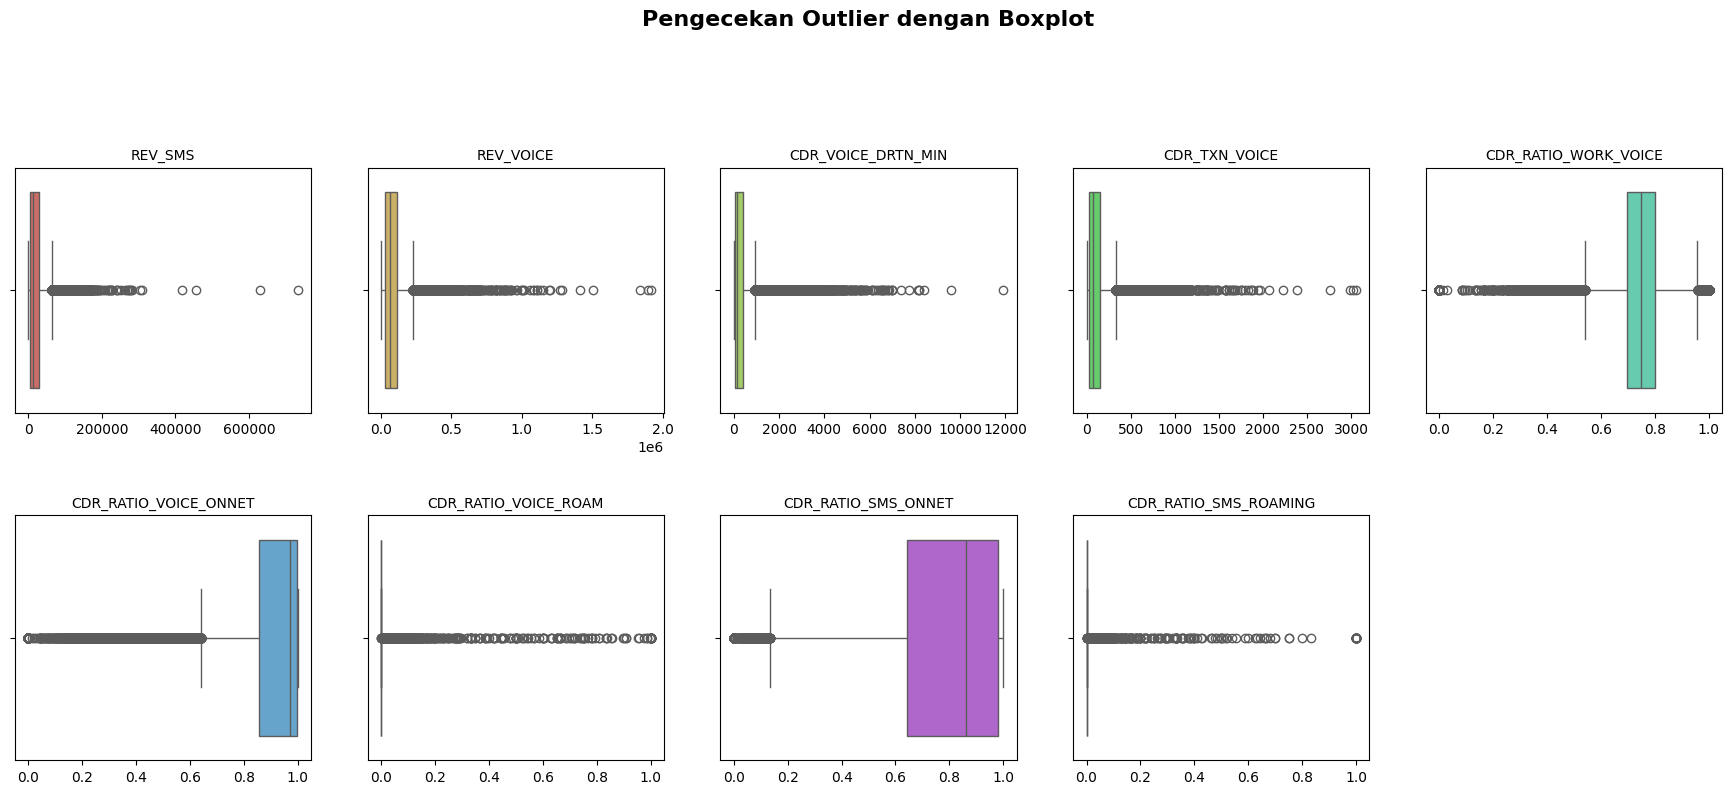

In [ ]:
# Boxplot untuk mengecek outlier (dengan data awal)
kolom_numerik = ds.describe().columns[1:10]
# Buat palet
palette = sns.color_palette("hls", len(kolom_numerik))
plt.figure(figsize=(18, 18))

# Loop melalui kolom dan indeks
for i in enumerate(kolom_numerik):
    # i[0] adalah indeks (0, 1, 2...), i[1] adalah nama kolom
    plt.subplot(5, 5, i[0] + 1)
    sns.boxplot(
        x=ds[i[1]],
        color=palette[i[0]]
    )
    plt.title(i[1], fontsize=10)
    plt.xlabel('')

plt.suptitle("Pengecekan Outlier dengan Boxplot", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0) # Menambahkan padding agar lebih rapi
plt.show()

In [ ]:
# Hitung jumlah observasi untuk setiap kelas
count_by_class = ds['REV_DATA'].value_counts()
print(f'"Jumlah observasi per kelas:"{count_by_class}' )

# Hitung persentase observasi untuk setiap kelas
percentage_by_class = ds['REV_DATA'].value_counts(normalize=True) * 100
print(f'"Persentase observasi per kelas:"{percentage_by_class}' )

"Jumlah observasi per kelas:"REV_DATA
1    33362
0    16638
Name: count, dtype: int64
"Persentase observasi per kelas:"REV_DATA
1    66.724
0    33.276
Name: proportion, dtype: float64


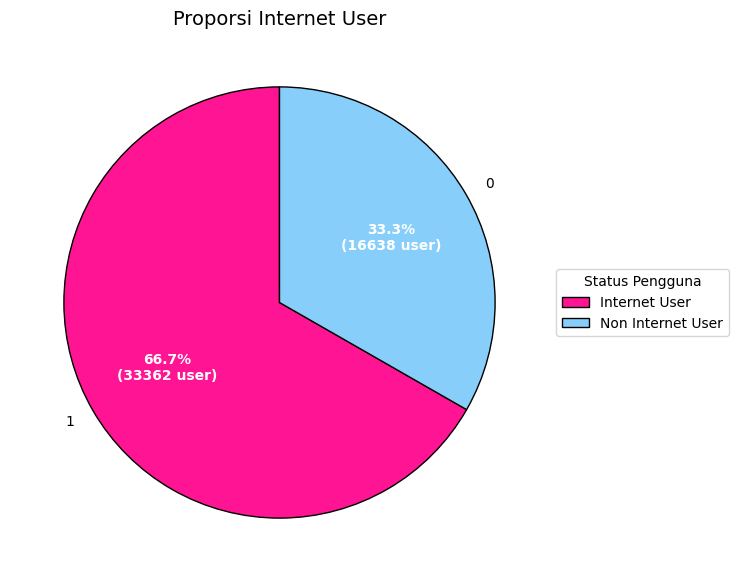

In [ ]:
# Visualisasi
total = count_by_class.sum()

plt.figure(figsize=(7, 7))
labels = count_by_class.index.astype(str) # Label '0' dan '1'

# Fungsi untuk format label pada pie chart
def func(pct, allvalues):
  absolute = int(np.round(pct/100.*total))
  return f"{pct:.1f}%\n({absolute} user)"

# Membuat Pie Chart
wedges, texts, autotexts = plt.pie(
    count_by_class,
    autopct=lambda pct: func(pct, count_by_class),
    labels=labels,
    colors=['deeppink', 'lightskyblue'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

# Menambahkan judul
plt.title('Proporsi Internet User', fontsize=14)

# Menambahkan legenda
custom_labels = {
    '0': 'Non Internet User',
    '1': 'Internet User'
}
legend_labels = [custom_labels[l] for l in labels]
plt.legend(wedges, legend_labels,
           title="Status Pengguna", # Mengganti judul legenda juga lebih baik
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Menyesuaikan ukuran teks di dalam slice
plt.setp(autotexts, size=10, weight="bold", color="white")

plt.show()

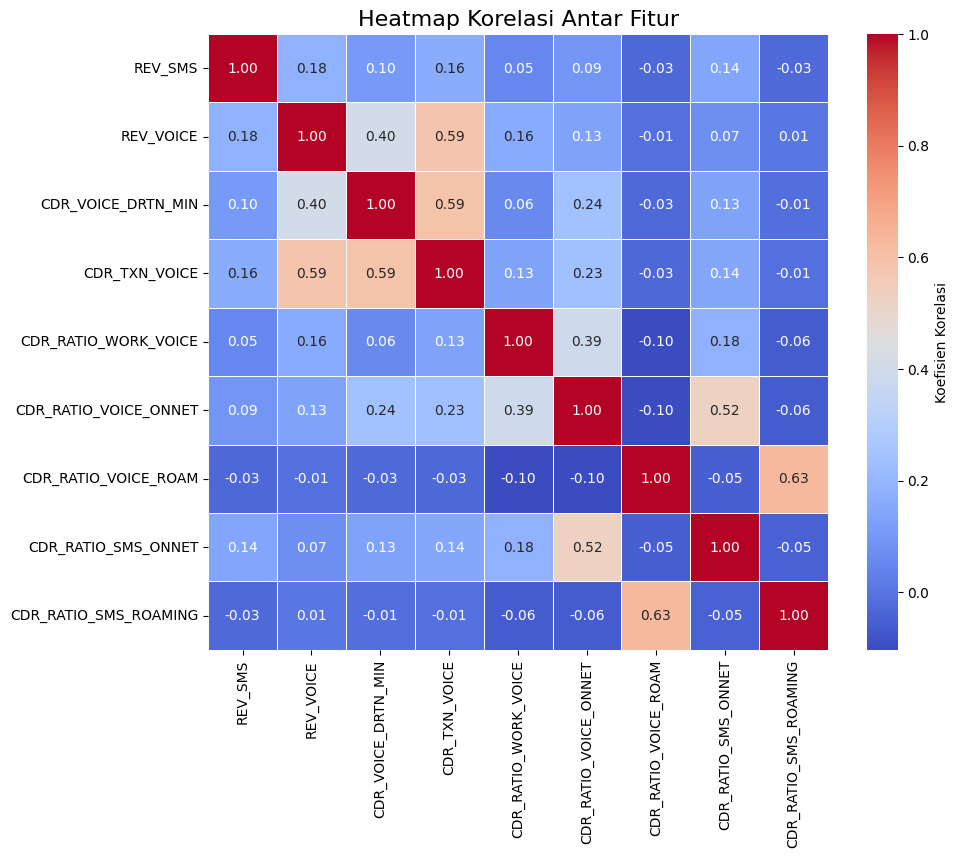

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ds.select_dtypes(include=np.number).columns.tolist()

features_only = [col for col in numerical_cols if col not in ['REV_DATA']]

# 2. Hitung Matriks Korelasi
correlation_matrix = ds[features_only].corr()

# 3. Visualisasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Menampilkan nilai korelasi pada heatmap
    fmt=".2f",         # Format 2 angka desimal
    cmap='coolwarm',   # Pilihan warna (misalnya 'coolwarm' atau 'viridis')
    linewidths=.5,     # Garis antar sel
    cbar_kws={'label': 'Koefisien Korelasi'}
)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

/tmp/ipython-input-1134331824.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1134331824.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1134331824.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1134331824.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1134331824.py:32: FutureWarning: 

Passin

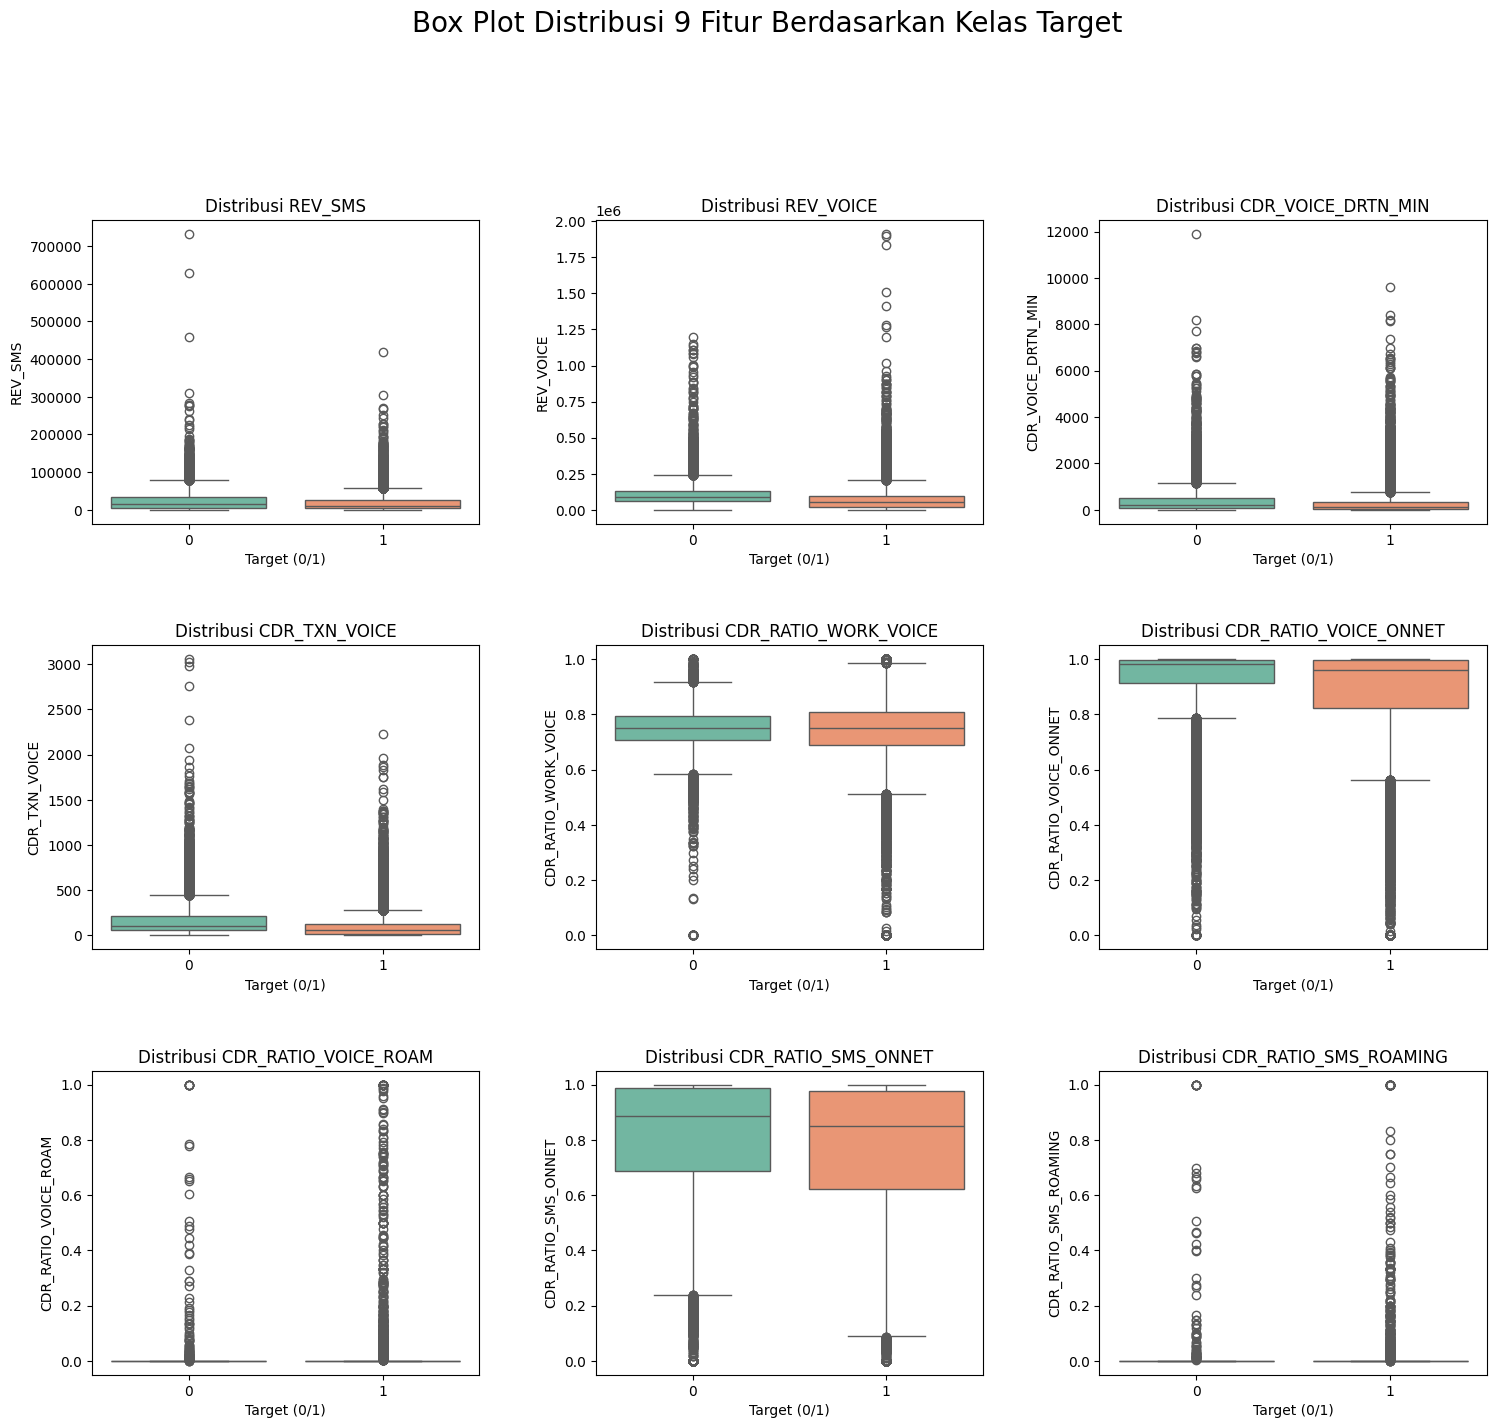

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan list features_to_plot Anda berisi 9 nama kolom
features_to_plot = features_only

# Tentukan ukuran grid (misalnya 3 baris dan 3 kolom)
n_rows = 3
n_cols = 3

# Pastikan jumlah fitur sesuai dengan grid, jika tidak, atur ukurannya
if len(features_to_plot) > n_rows * n_cols:
    print("Jumlah fitur melebihi ukuran grid. Sesuaikan n_rows atau n_cols.")
    # Kita tetap akan menggunakan 9 fitur pertama untuk demonstrasi
    features_to_plot = features_to_plot[:n_rows * n_cols]


# Membuat figure dan set of subplots (axes)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))
# fig: keseluruhan figure
# axes: array dari subplots (misalnya axes[0, 0], axes[0, 1], dst.)
plt.subplots_adjust(hspace=0.4, wspace=0.3) # Memberi jarak antar subplot


# Loop melalui setiap fitur dan setiap posisi di grid
for i, feature in enumerate(features_to_plot):
    # Hitung posisi baris dan kolom di grid
    row = i // n_cols
    col = i % n_cols

    # Membuat Box Plot pada subplot yang sesuai (axes[row, col])
    sns.boxplot(
        x='REV_DATA', # Variabel Kategorikal (Target)
        y=feature,            # Variabel Numerik (Fitur)
        data=ds,
        palette='Set2',
        ax=axes[row, col]
    )

    # Pengaturan judul dan label untuk setiap subplot
    axes[row, col].set_title(f'Distribusi {feature}', fontsize=12)
    axes[row, col].set_xlabel('Target (0/1)')
    axes[row, col].set_ylabel(feature)

# Beri judul keseluruhan figure
fig.suptitle('Box Plot Distribusi 9 Fitur Berdasarkan Kelas Target', fontsize=20, y=1.02)
plt.show()

# Preprocessing data

In [ ]:
#pembagian x dan y
import pandas as pd

y = ds.iloc[:, 0]
X = ds.iloc[:, 1:10]

print(f"Bentuk (Shape) Fitur (X): {X.shape}")
print(f"Bentuk (Shape) Target (y): {y.shape}")

Bentuk (Shape) Fitur (X): (50000, 9)
Bentuk (Shape) Target (y): (50000,)


In [ ]:
#pembagian data (20:80)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% data uji
    random_state=42,     # Untuk reproduktifitas
    stratify=y           # Memastikan rasio target 0/1 sama di train/test
)

print("\n✅ Hasil Pembagian Data (80:20):")
print(f"X_train (Data Latih Fitur): {X_train.shape}")
print(f"X_test (Data Uji Fitur): {X_test.shape}")
print(f"y_train (Data Latih Target): {y_train.shape}")
print(f"y_test (Data Uji Target): {y_test.shape}")


✅ Hasil Pembagian Data (80:20):
X_train (Data Latih Fitur): (40000, 9)
X_test (Data Uji Fitur): (10000, 9)
y_train (Data Latih Target): (40000,)
y_test (Data Uji Target): (10000,)


In [ ]:
# Mengecek multikolinieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=X_train
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

display(vif_data)

,feature,VIF
0,REV_SMS,1.791571
1,REV_VOICE,3.217200
2,CDR_VOICE_DRTN_MIN,2.176283
3,CDR_TXN_VOICE,3.205612
4,CDR_RATIO_WORK_VOICE,20.993376
5,CDR_RATIO_VOICE_ONNET,31.215999
6,CDR_RATIO_VOICE_ROAM,1.786630
7,CDR_RATIO_SMS_ONNET,13.834322
8,CDR_RATIO_SMS_ROAMING,1.785317


In [ ]:
# handle outlier
from sklearn.ensemble import IsolationForest
X=X_train
model_if = IsolationForest(contamination='auto', random_state=42)
X['outlier_flag'] = model_if.fit_predict(X)

# Filter: Ambil hanya data 'normal' (flag == 1)
X_cleaned = X[X['outlier_flag'] == 1].drop(columns=['outlier_flag'])
X_cleaned.head()

,REV_SMS,REV_VOICE,CDR_VOICE_DRTN_MIN,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_ROAMING
30124,4637.500000,13932.500000,6.500000,15.000000,0.775000,0.950000,0.0,0.777273,0.0
14667,11400.000000,69215.666667,108.666667,86.666667,0.954737,0.941336,0.0,0.868590,0.0
26768,35877.666667,46961.000000,75.666667,79.666667,0.803317,1.000000,0.0,0.992968,0.0
14246,6825.000000,237041.666670,292.333333,107.666667,0.758412,0.846052,0.0,0.721724,0.0
1024,1500.000000,18633.000000,6.333333,8.666667,0.831502,0.691087,0.0,0.638889,0.0


In [ ]:
X_cleaned.describe()


,REV_SMS,REV_VOICE,CDR_VOICE_DRTN_MIN,CDR_TXN_VOICE,CDR_RATIO_WORK_VOICE,CDR_RATIO_VOICE_ONNET,CDR_RATIO_VOICE_ROAM,CDR_RATIO_SMS_ONNET,CDR_RATIO_SMS_ROAMING
count,36924.000000,36924.000000,36924.000000,36924.000000,36924.000000,36924.000000,36924.000000,36924.000000,36924.000000
mean,18837.398661,77373.310584,293.042041,108.819174,0.747232,0.904983,0.000158,0.789899,0.000042
std,19681.102945,61264.434771,403.657218,116.389361,0.101962,0.145782,0.003048,0.232248,0.001662
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4358.333333,32462.750000,43.333333,30.666667,0.700400,0.874807,0.000000,0.665816,0.000000
50%,11850.833333,65208.833333,140.333333,70.333333,0.751562,0.973591,0.000000,0.871533,0.000000
75%,26589.166667,104983.750000,372.000000,142.333333,0.803571,0.997669,0.000000,0.983333,0.000000
max,146300.000000,734572.333330,3639.333333,917.000000,1.000000,1.000000,0.200000,1.000000,0.200000


In [ ]:
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36924 entries, 30124 to 43131
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REV_SMS                36924 non-null  float64
 1   REV_VOICE              36924 non-null  float64
 2   CDR_VOICE_DRTN_MIN     36924 non-null  float64
 3   CDR_TXN_VOICE          36924 non-null  float64
 4   CDR_RATIO_WORK_VOICE   36924 non-null  float64
 5   CDR_RATIO_VOICE_ONNET  36924 non-null  float64
 6   CDR_RATIO_VOICE_ROAM   36924 non-null  float64
 7   CDR_RATIO_SMS_ONNET    36924 non-null  float64
 8   CDR_RATIO_SMS_ROAMING  36924 non-null  float64
dtypes: float64(9)
memory usage: 2.8 MB


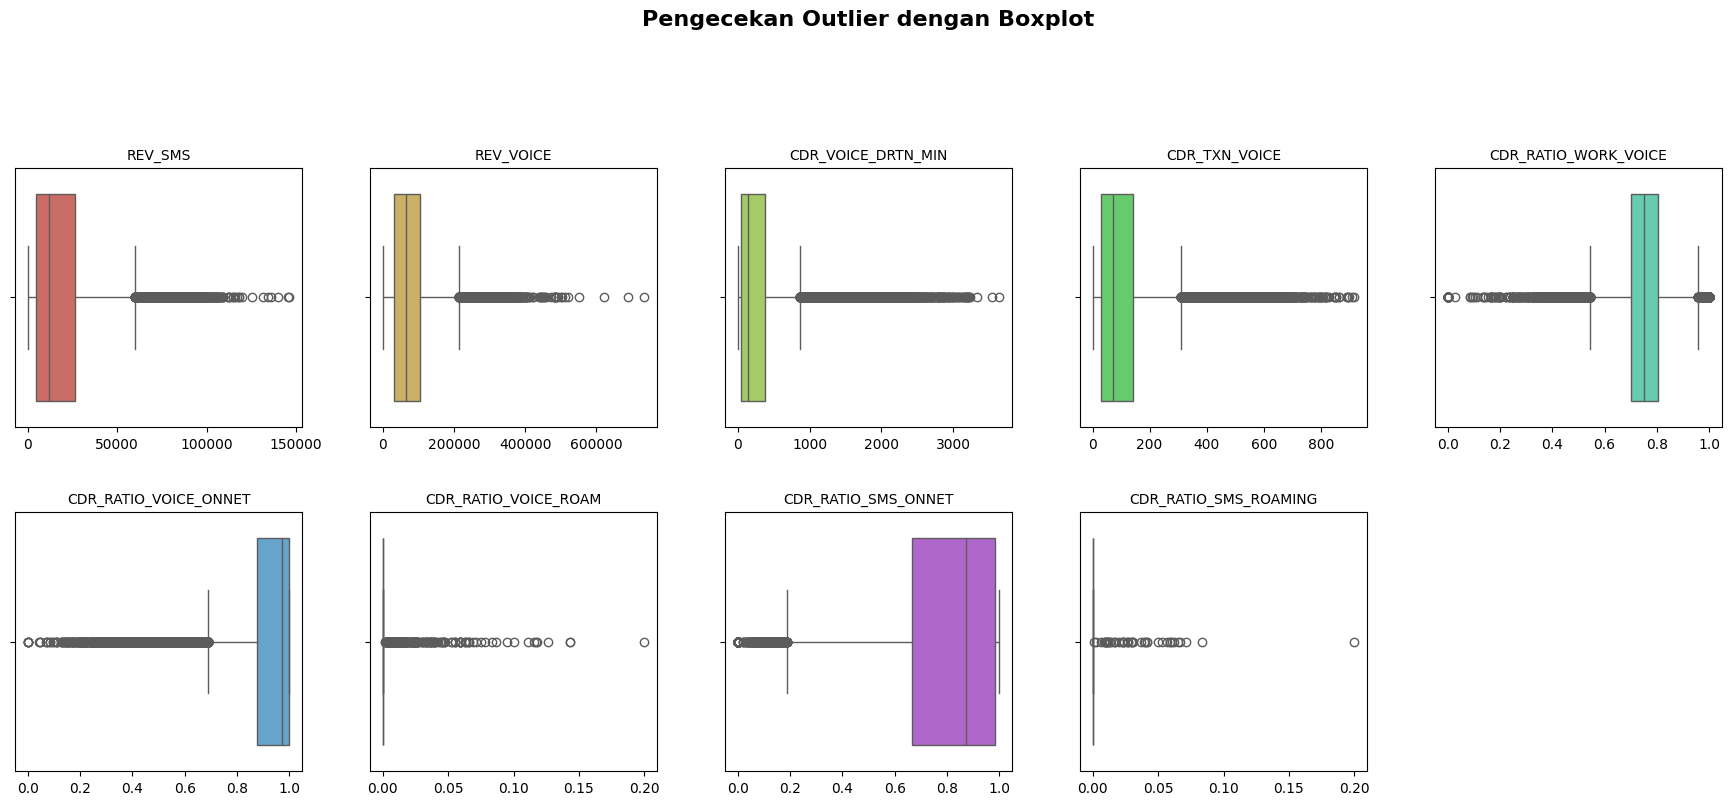

In [ ]:
# Boxplot untuk mengecek outlier (dengan data yang sudah dibersihkan)
kolom_numerik = X_cleaned.describe().columns[:9]
# Buat palet
palette = sns.color_palette("hls", len(kolom_numerik))
plt.figure(figsize=(18, 18))

# Loop melalui kolom dan indeks
for i in enumerate(kolom_numerik):
    # i[0] adalah indeks (0, 1, 2...), i[1] adalah nama kolom
    plt.subplot(5, 5, i[0] + 1)
    sns.boxplot(
        x=X_cleaned[i[1]],
        color=palette[i[0]]
    )
    plt.title(i[1], fontsize=10)
    plt.xlabel('')

plt.suptitle("Pengecekan Outlier dengan Boxplot", y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0) # Menambahkan padding agar lebih rapi
plt.show()

In [ ]:
# Ambil INDEX baris yang tersisa di X_cleaned
indices_to_keep = X_cleaned.index

# Filter y_train menggunakan indeks tersebut
y_cleaned = y_train.loc[indices_to_keep]

transformasi data

In [ ]:
# Fit dan transform pada data training
#Scaling Fitur (Pada data X_train bersih)
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()

# Lakukan fit_transform pada data training yang sudah bersih
X_scaled = scaler.fit_transform(X_cleaned)

# Ubah kembali ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_cleaned.columns)

In [ ]:
# Transform pada data testing
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# **Klasifikasi**

1. Validasi (hold-out validation)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# 1. Menentukan Range k yang Akan Diuji
# =================================================================
# Menguji k dari 1 hingga 20.
k_values = range(1, 21)
akurasi = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_scaled, y_cleaned)
    y_pred_k = model.predict(X_test_scaled)
    akurasi.append(accuracy_score(y_test, y_pred_k))

print(list(zip(k_values, akurasi)))

[(1, 0.6309), (2, 0.5951), (3, 0.6457), (4, 0.626), (5, 0.6484), (6, 0.641), (7, 0.6572), (8, 0.65), (9, 0.658), (10, 0.6537), (11, 0.6633), (12, 0.6554), (13, 0.6672), (14, 0.6593), (15, 0.6687), (16, 0.6666), (17, 0.6699), (18, 0.6664), (19, 0.6724), (20, 0.6692)]


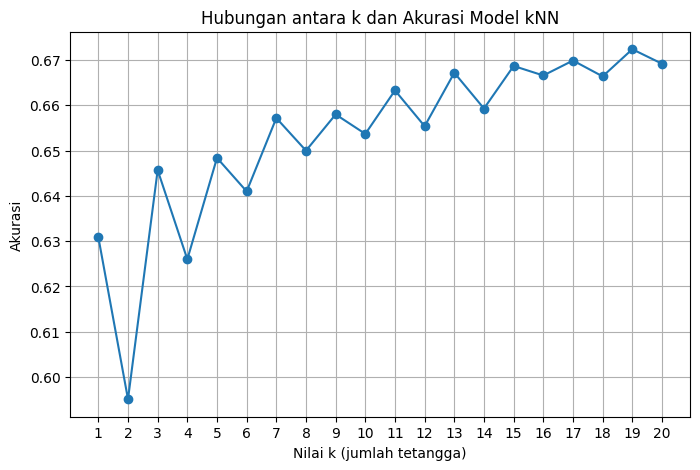

In [ ]:
# Membuat plot antara  k d
plt.figure(figsize=(8, 5))
plt.plot(k_values, akurasi, marker='o')
plt.title("Hubungan antara k dan Akurasi Model kNN")
plt.xlabel("Nilai k (jumlah tetangga)")
plt.ylabel("Akurasi")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
#membuat model dengan k terbaik yaitu k=19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_scaled, y_cleaned)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred = knn.predict(X_test_scaled)
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1184 2144]
 [1132 5540]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.36      0.42      3328
           1       0.72      0.83      0.77      6672

    accuracy                           0.67     10000
   macro avg       0.62      0.59      0.60     10000
weighted avg       0.65      0.67      0.65     10000



In [ ]:
#sensitivity dan specifity
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Perhitungan Metrik
Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)

print(f"Sensitivity (Recall): {Sensitivity:.4f}")
print(f"Specificity: {Specificity:.4f}")

Sensitivity (Recall): 0.8303
Specificity: 0.3558


In [ ]:
# HITUNG AKURASI
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasilnya
print(f"Nilai Akurasi: {accuracy:.4f}")
print(f"Persentase Akurasi: {accuracy * 100:.2f}%")

Nilai Akurasi: 0.6724
Persentase Akurasi: 67.24%


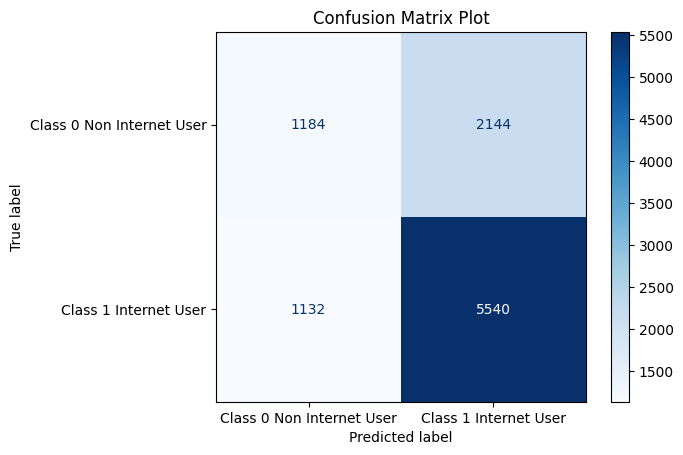

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_labels = ["Class 0 Non Internet User", "Class 1 Internet User"]
# --- 2. Hitung Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- 3. Visualisasi Plot ---

# Membuat objek display
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_labels
)

# Plot matriks
# cmap=plt.cm.Blues memberikan skema warna biru untuk heatmap
disp.plot(cmap=plt.cm.Blues)

# Tambahkan judul dan tampilkan plot
plt.title("Confusion Matrix Plot")
plt.show()

In [ ]:
#kurva roc
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

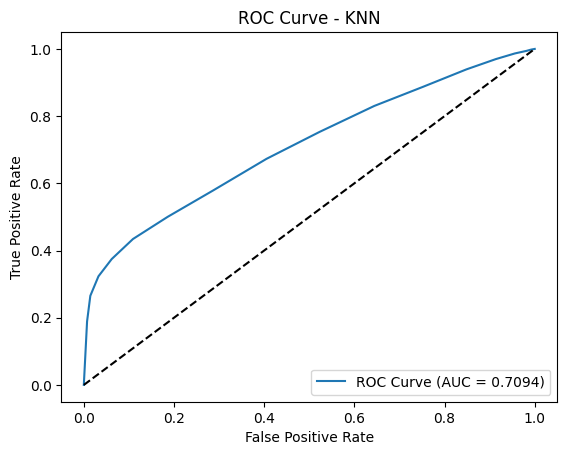

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# prediksi probabilitas kelas 1
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

# hitung nilai fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # garis random
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()


In [ ]:
#kappa
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_k)
print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.2204708318471693


2. Validasi silang (cross validation)

In [ ]:
k_values = range(1, 21)
cv_scores = []            # menyimpan skor rata-rata CV

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_scaled, y_cleaned, cv=5)  # 5-fold CV
    cv_scores.append(scores.mean())

# tampilkan hasil k dan skor cv
for k, score in zip(k_values, cv_scores):
    print(f"k={k}, CV Score={score:.4f}")

# cari k terbaik (CV score tertinggi)
best_k = k_values[np.argmax(cv_scores)]
print("\nK terbaik berdasarkan cross-validation:", best_k)

k=1, CV Score=0.6344
k=2, CV Score=0.5994
k=3, CV Score=0.6495
k=4, CV Score=0.6322
k=5, CV Score=0.6538
k=6, CV Score=0.6432
k=7, CV Score=0.6597
k=8, CV Score=0.6527
k=9, CV Score=0.6641
k=10, CV Score=0.6587
k=11, CV Score=0.6667
k=12, CV Score=0.6630
k=13, CV Score=0.6687
k=14, CV Score=0.6646
k=15, CV Score=0.6710
k=16, CV Score=0.6663
k=17, CV Score=0.6730
k=18, CV Score=0.6679
k=19, CV Score=0.6744
k=20, CV Score=0.6701

K terbaik berdasarkan cross-validation: 19


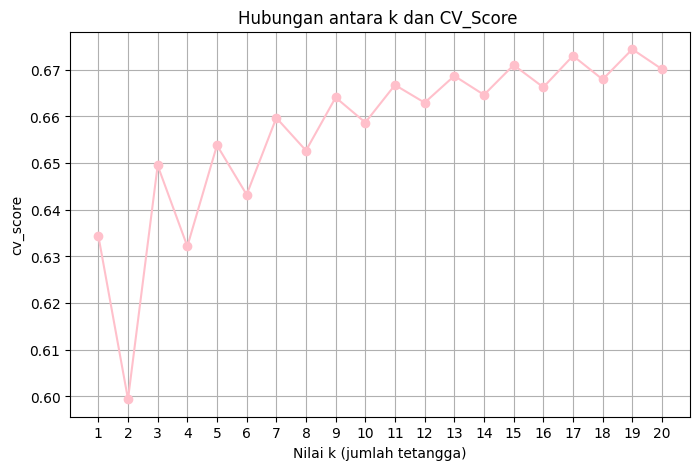

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o',color='pink')
plt.title("Hubungan antara k dan CV_Score ")
plt.xlabel("Nilai k (jumlah tetangga)")
plt.ylabel("cv_score")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# latih model final menggunakan k terbaik
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_scaled, y_cleaned)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred = final_knn.predict(X_test_scaled)
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1184 2144]
 [1132 5540]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.36      0.42      3328
           1       0.72      0.83      0.77      6672

    accuracy                           0.67     10000
   macro avg       0.62      0.59      0.60     10000
weighted avg       0.65      0.67      0.65     10000



In [ ]:
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasilnya
print(f"Nilai Akurasi: {accuracy:.4f}")
print(f"Persentase Akurasi: {accuracy * 100:.2f}%")

Nilai Akurasi: 0.6724
Persentase Akurasi: 67.24%


In [ ]:
#sensitivity dan specifity
cm = confusion_matrix(y_test, y_pred)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Perhitungan Metrik
Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)

print(f"Sensitivity (Recall): {Sensitivity:.4f}")
print(f"Specificity: {Specificity:.4f}")

Sensitivity (Recall): 0.8303
Specificity: 0.3558


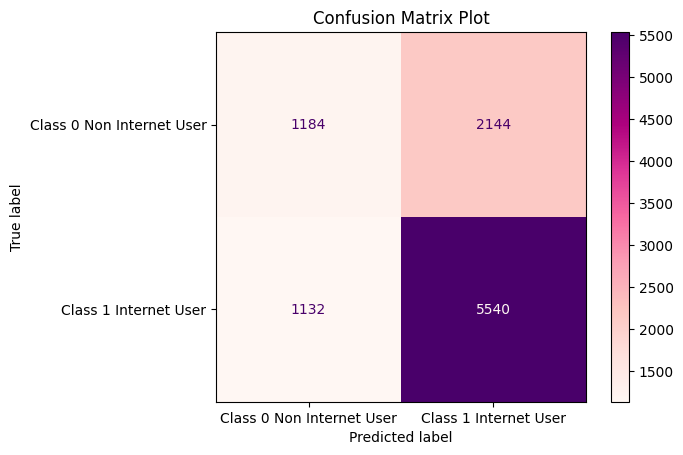

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_labels = ["Class 0 Non Internet User", "Class 1 Internet User"]
# --- 2. Hitung Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- 3. Visualisasi Plot ---

# Membuat objek display
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_labels
)

# Plot matriks
# cmap=plt.cm.Blues memberikan skema warna biru untuk heatmap
disp.plot(cmap=plt.cm.RdPu)

# Tambahkan judul dan tampilkan plot
plt.title("Confusion Matrix Plot")
plt.show()

In [ ]:
#kurva roc
y_prob = final_knn.predict_proba(X_test_scaled)[:, 1]

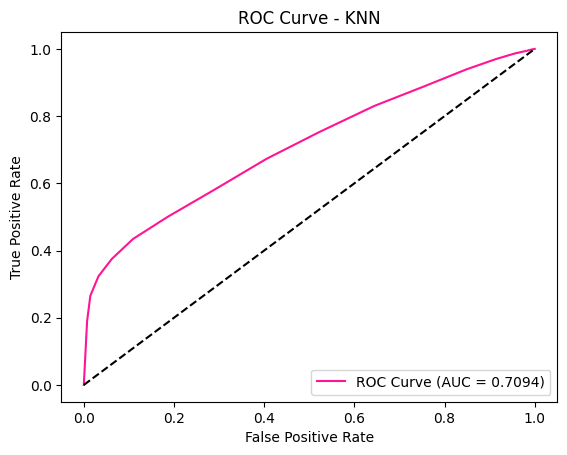

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# prediksi probabilitas kelas 1
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

# hitung nilai fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# plot
plt.figure()
plt.plot(fpr, tpr,  color="deeppink", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')  # garis random
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()


In [ ]:
#kappa
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred_k)
print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.2204708318471693
